# Plot saved reconstruction snapshots from training

Subject: Obs2Wrfmpi for 1st era/obs storm, unit-wnet-wrferaext18-8f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc

### TOC
 [1. Load data](#ld)<br>

<a id='ld'></a>
# Load data

In [10]:
# load per-variable scale factors
minmaxi_era = np.load('/glade/scratch/dkorytin/minmaxi_wrferaext18.npy')
minmaxi_mpi = minmaxi_era


# Plot routines

In [102]:
def show_saved_reconstruction(ii, input_chunk, xoff=20, yoff=58, vmin=None, vmax=None):
    # denorm
    input_img_denorm = input_chunk * (minmaxi_era[:,1]-minmaxi_era[:,0])[np.newaxis,:,np.newaxis,np.newaxis] + minmaxi_era[:,0][np.newaxis,:,np.newaxis,np.newaxis]
    raw_era = np.array(input_img_denorm)[0]
    raw_era[np.isnan(raw_era)] = 0.   # extended surface domain has nan's at bottom
    #raw_era[8:] = (raw_era * mask)[8:]

    # ^4 prec
    raw_era[8] = raw_era[8] ** 4.
     
    if vmin == None or vmax == None:
        vmin = [raw_era[ii].min() for ii in range(18)]
        vmax = [raw_era[ii].max() for ii in range(18)]

    svars = [0,1,2,3,4,5,6,7,17]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)
    svars = [8,9,10,11,12,13,14,15,16]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)
    
    return vmin, vmax


In [136]:
# 0-mean
era_mean = np.array([0.535485  , 0.4519444 , 0.28083166, 0.6958344 , 0.74353546,
        0.7667949 , 0.45282447, 0.53518105, 0.02868525, 0.3436686 ,
        0.32084906, 0.27729246, 0.26444143, 0.06457039, 0.1160536 ,
        0.11771968, 0.27282715, 0.4996573 ], dtype='float32')
mpi_mean = np.array([0.5344214 , 0.45174   , 0.2868751 , 0.67098534, 0.7369371 ,
        0.75135934, 0.44308293, 0.5318341 , 0.03761845, 0.18091248,
        0.18680423, 0.1376027 , 0.13063669, 0.06532818, 0.14322543,
        0.11771968, 0.27282715, 0.4996573 ], dtype='float32')



Original Input


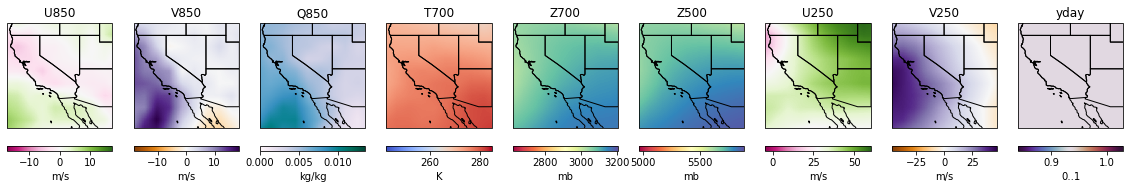

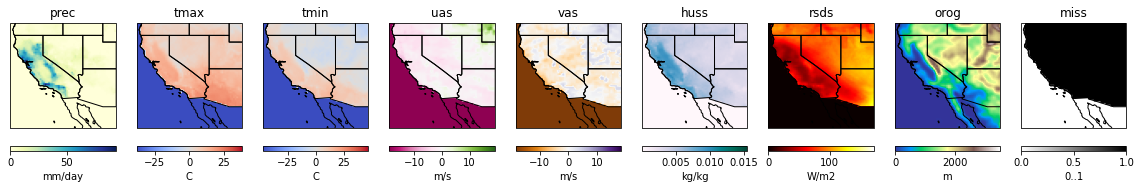

In [103]:
# show raw input as header and use its min/max for subsequent autoscale

# Weather anomalies from paper
storms = np.load('/glade/scratch/dkorytin/storms_wrferaext18.npy')[0:1]
#storms[np.isnan(storms)] = 0.   # extended surface domain has nan's at bottom
minmaxi_era = np.load('/glade/scratch/dkorytin/minmaxi_wrferaext18.npy')
minmaxi_mpi = minmaxi_era

# denormalize
input_img_denorm = storms * (minmaxi_era[:,1]-minmaxi_era[:,0])[np.newaxis,:,np.newaxis,np.newaxis] + minmaxi_era[:,0][np.newaxis,:,np.newaxis,np.newaxis]
raw_era = np.array(input_img_denorm)[0]
raw_era[np.isnan(raw_era)] = 0.   # extended surface domain has nan's at bottom

# ^4 prec
raw_era[8] = raw_era[8] ** 4.


vmin = [raw_era[0][ii].min() for ii in range(18)]
vmax = [raw_era[0][ii].max() for ii in range(18)]

print('Original Input')
storms = np.load('/glade/scratch/dkorytin/storms_wrferaext18.npy')[0:1]

vmin, vmax = show_saved_reconstruction(0, storms[0])


In [104]:
print(vmax)

[17.34402002279171, 18.463630418960065, 0.013535473766310802, 284.7338595689653, 3206.861337834969, 5884.821454404184, 60.12464441407246, 46.85462404842019, 93.61626093226774, 27.68681559762217, 22.696133072191515, 14.616988484894932, 9.339969789790757, 0.015555081130633433, 171.44283486673157, 3488.182861328125, 1.0, 0.934834897518158]


['50000', '0.030389096587896347', '0.013816425576806068', '0.037053823471069336', '0.0597650408744812', '2.4950828552246094', '0.07709378749132156']


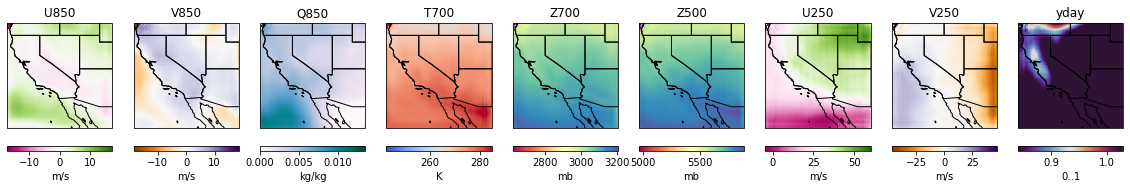

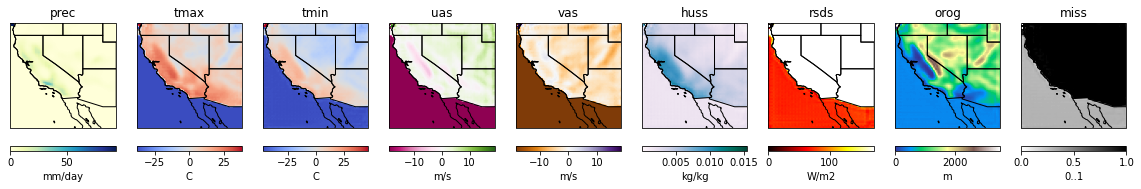

['100000', '0.0030341206584125757', '0.0025061150081455708', '0.03573143482208252', '0.024764060974121094', '2.1609344482421875', '0.07627387344837189']


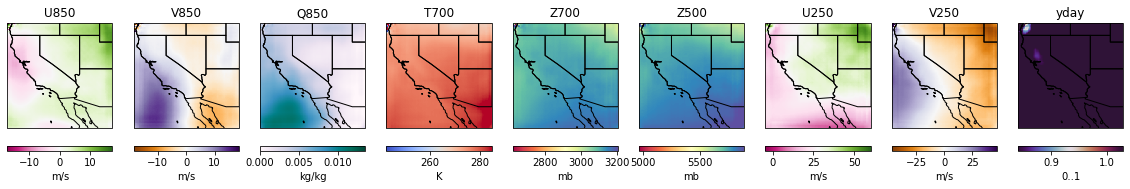

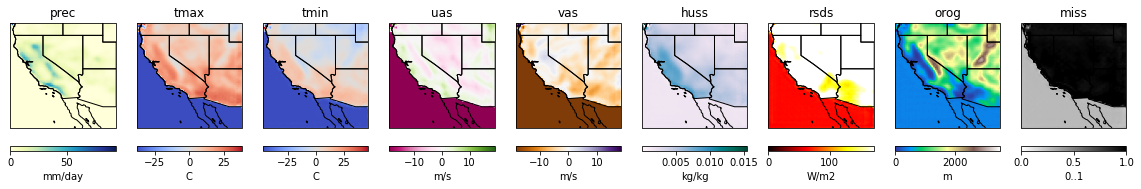

['150000', '0.002297633560374379', '0.0010730141075327992', '0.026399731636047363', '0.018474280834197998', '1.5834803581237793', '0.04874281585216522']


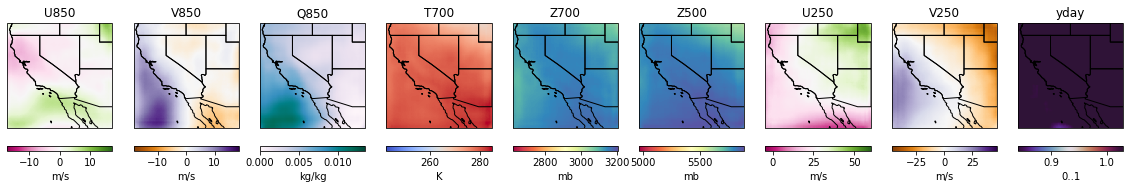

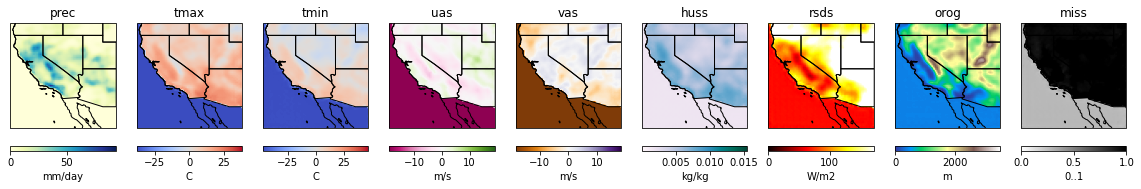

['200000', '0.0007084087701514363', '0.0007092177984304726', '0.018547475337982178', '0.020589828491210938', '1.5887502431869507', '0.04401538521051407']


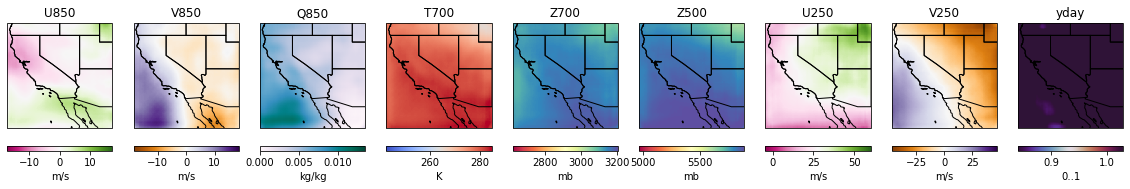

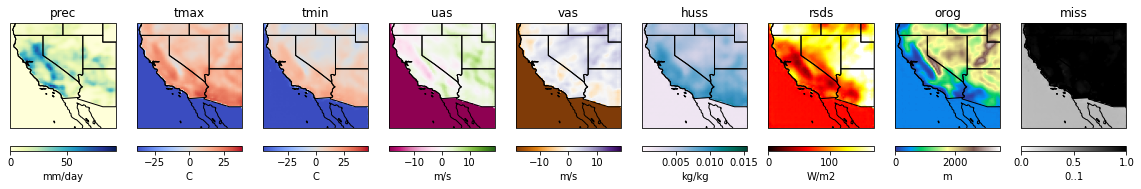

['250000', '0.0005310282576829195', '0.0009629968553781509', '0.020480811595916748', '0.005051910877227783', '1.1034754514694214', '0.04457918554544449']


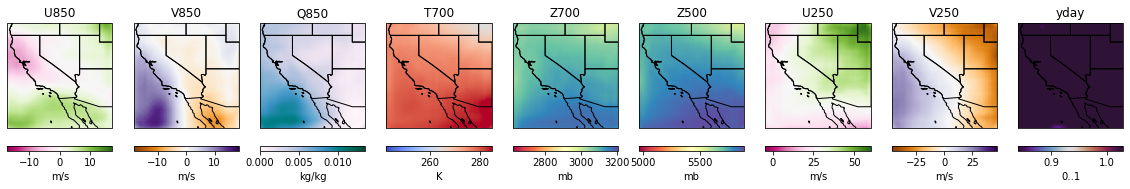

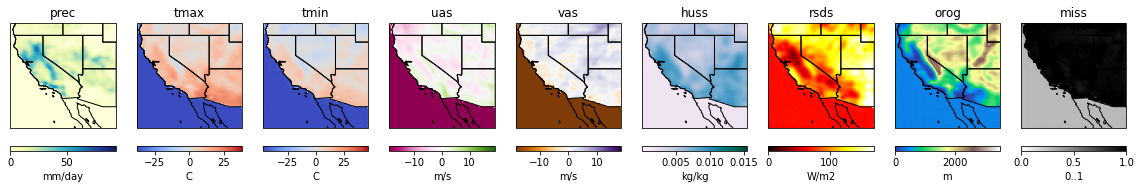

['300000', '0.0006847231416031718', '0.0006986113730818033', '0.017317473888397217', '0.009553492069244385', '1.1341615915298462', '0.031339921057224274']


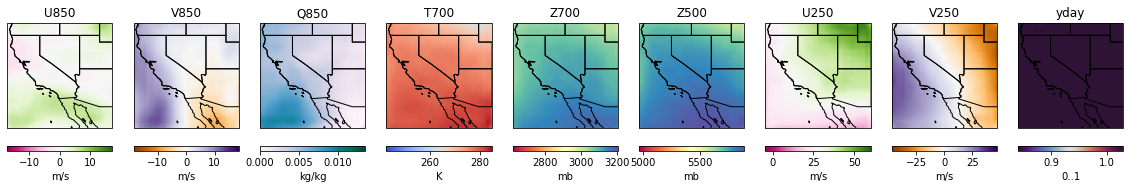

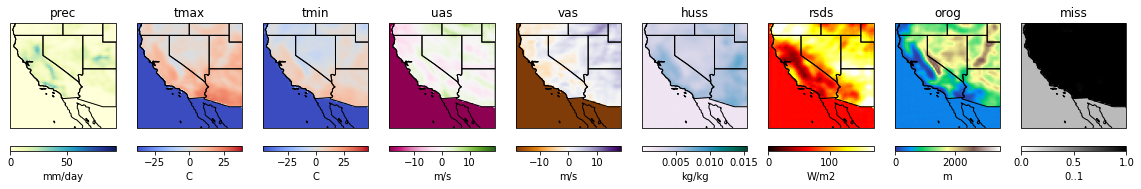

['350000', '0.0008723681094124913', '0.0013183536939322948', '0.016458213329315186', '0.01878112554550171', '1.3188611268997192', '0.033670760691165924']


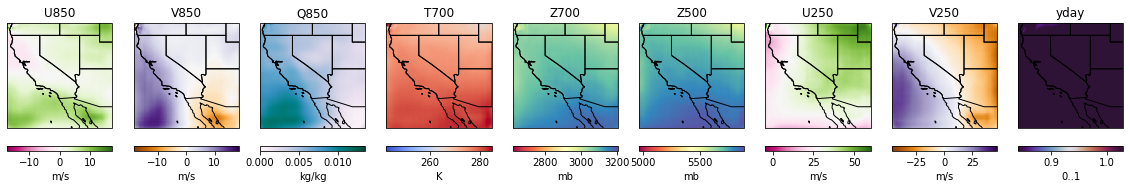

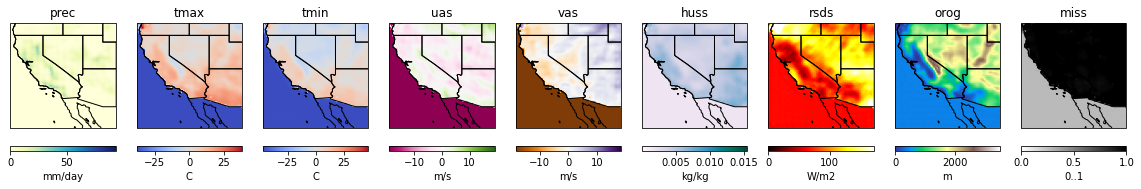

In [151]:
# Open the CSV file for reading
with open('/glade/scratch/dkorytin/unit-wnet-wrferaext18-32f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc/output/mse.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

    # Loop over each line in the CSV file
    for row in csv_reader:
        # `row` is a list representing the values in the current row   
        ii = int(row[0])
        if int(ii) % 50000 == 0:
            print(row)  # Example: print the row data

            #padded_str = str(ii).zfill(6)
            padded_str = str(ii)

            ## Load numpy file
            arr = np.load('/glade/scratch/dkorytin/unit-wnet-wrferaext18-32f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc/output/ii_'+padded_str+'_mpi.npy')

            # 0 mean
            arr += mpi_mean.reshape((1, 18, 1, 1))

            ## 0.5 mean
            #arr += (era_mean.reshape((1, 18, 1, 1)) + 0.5)

            #show_saved_reconstruction(0, arr)
            show_saved_reconstruction(0, arr, vmin=vmin, vmax=vmax)